In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr
import boutdata

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"/ssd_scratch/scripts/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from cli.cmonitor import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

In [3]:
toload = [ 
    dict(name="base", id="tcor4-newbase_forpuff", unnormalise_geom = True, use_xhermes = True, squash = False), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case tcor4-newbase_forpuff
-----------------------

Unnormalising with xHermes


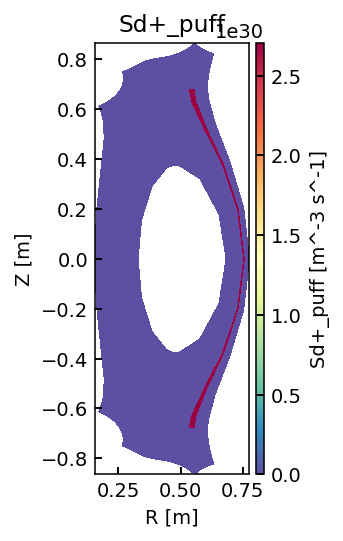

In [4]:
ds = cs["base"].ds

fig, ax = plt.subplots()
ds["Sd+_puff"].bout.polygon(ax = ax, cmap = "Spectral_r", separatrix = False)


In [11]:
path = r"/ssd_scratch/hcases/g3a4x1-puff2TEST.nc"

with DataFile(path) as mesh:
    src =mesh["Nd_src"]
    
    
    print(src[src != 0])

[1.67554281e+23 1.75899320e+23 1.96515486e+23 1.96515486e+23
 1.75899320e+23 1.67554281e+23]


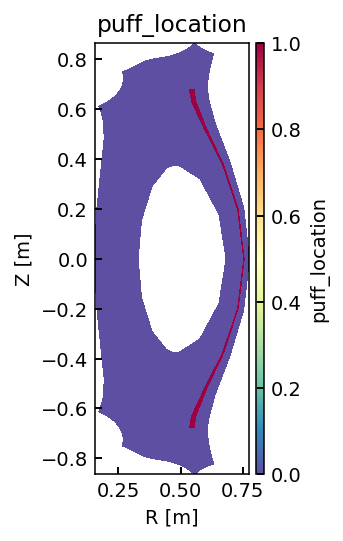

In [5]:
ds = cs["base"].ds

fig, ax = plt.subplots()
ds["puff_location"].bout.polygon(ax = ax, cmap = "Spectral_r", separatrix = False)


In [6]:
vol = (ds["dv"] * ds["puff_location"]).sum().values
vol_norm = vol / ds.metadata["rho_s0"]**3
puff_src = ds["Sd+_puff"].mean().values
puff_rate = (puff_src * vol).sum()

input_rate = 1.5e21
input_rate_norm = input_rate / ds.metadata["Omega_ci"]
source_norm = input_rate_norm / vol_norm
source = source_norm * ds.metadata["Nnorm"] * ds.metadata["Omega_ci"]

print(f"Volume: {vol:.3e} [m^3]")
print(f"Normalised volume: {vol_norm:.3e}")
print(f"Puff rate in model: {puff_rate:.3e} [s^-1]")
print(f"Source in model: {puff_src:.3e} [m^-3 s^-1]")

print("-"*30)
print(f"Flowrate: {input_rate:.3e} [s^-1]")
print(f"Normalised flowrate: {input_rate_norm:.3e} [-]")
print(f"Normalised source: {source_norm:.3e} [-]")
print(f"Source: {source:.3e} [-]")
# prin

Volume: 5.920e-02 [m^3]
Normalised volume: 5.550e+07
Puff rate in model: 1.379e+27 [s^-1]
Source in model: 2.330e+28 [m^-3 s^-1]
------------------------------
Flowrate: 1.500e+21 [s^-1]
Normalised flowrate: 1.566e+13 [-]
Normalised source: 2.822e+05 [-]
Source: 2.703e+30 [-]
